This notebook contains the data analysis and results after performing the calibrations without chimeric spectra (ref. CalibrationV8.ipynb).

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Read and print shape of uncalibrated data (linear)
uncal_results = "results/sage/PXD001468_uncal.tsv"
df_uncal_results = pd.read_csv(uncal_results, sep='\t')
print("Lineair data uncalibrated:                     ", df_uncal_results.shape)

# Filtered uncalibrated data based on spectrum_q (linear)
df_uncal_results_q = df_uncal_results[df_uncal_results["spectrum_q"] < 0.01]
print("Lineair data uncalibrated q:                   ", df_uncal_results_q.shape)

LRcal_results = "results/sage/PXD001468_LRcal.tsv"
df_LRcal_results = pd.read_csv(LRcal_results, sep='\t')
print("Lineair data LR calibrated:                    ", df_LRcal_results.shape)

# Filtered uncalibrated data based on spectrum_q
df_LRcal_results_q = df_LRcal_results[df_LRcal_results["spectrum_q"] < 0.01]
print("Lineair data LR calibrated q:                  ", df_LRcal_results_q.shape)

# Read and print shape of uncalibrated data
RFcal_results = "results/sage/PXD001468_RFcal.tsv"
df_RFcal_results = pd.read_csv(RFcal_results, sep='\t')
print("Lineair data RF calibrated:                    ", df_RFcal_results.shape)

# Filtered uncalibrated data based on spectrum_q
df_RFcal_results_q = df_RFcal_results[df_RFcal_results["spectrum_q"] < 0.01]
print("Lineair data RF calibrated q:                  ", df_RFcal_results_q.shape)

print("")

# Read and print shape of uncalibrated data (non_linear)
uncal_results_nonlin = "results/sage/PXD032235_uncal.tsv"
df_uncal_results_nonlin = pd.read_csv(uncal_results_nonlin, sep='\t')
print("Lineair data uncalibrated:                     ", df_uncal_results_nonlin.shape)

# Filtered uncalibrated data based on spectrum_q (non_linear)
df_uncal_results_nonlin_q = df_uncal_results_nonlin[df_uncal_results_nonlin["spectrum_q"] < 0.01]
print("Lineair data uncalibrated q:                   ", df_uncal_results_nonlin_q.shape)

LRcal_results_nonlin = "results/sage/PXD032235_LRcal.tsv"
df_LRcal_results_nonlin = pd.read_csv(LRcal_results_nonlin, sep='\t')
print("Lineair data LR calibrated:                    ", df_LRcal_results_nonlin.shape)

df_LRcal_results_nonlin_q = df_LRcal_results_nonlin[df_LRcal_results_nonlin["spectrum_q"] < 0.01]
print("Lineair data LR calibrated q:                  ", df_LRcal_results_nonlin_q.shape)

RFcal_results_nonlin = "results/sage/PXD032235_RFcal.tsv"
df_RFcal_results_nonlin = pd.read_csv(RFcal_results_nonlin, sep='\t')
print("Lineair data RF calibrated:                    ", df_RFcal_results_nonlin.shape)

df_RFcal_results_nonlin_q = df_RFcal_results_nonlin[df_RFcal_results_nonlin["spectrum_q"] < 0.01]
print("Lineair data RF calibrated q:                  ", df_RFcal_results_nonlin_q.shape)

Lineair data uncalibrated:                      (38849, 36)
Lineair data uncalibrated q:                    (20126, 36)
Lineair data LR calibrated:                     (38443, 36)
Lineair data LR calibrated q:                   (20690, 36)
Lineair data RF calibrated:                     (38847, 36)
Lineair data RF calibrated q:                   (20664, 36)

Lineair data uncalibrated:                      (59397, 36)
Lineair data uncalibrated q:                    (46414, 36)
Lineair data LR calibrated:                     (56417, 36)
Lineair data LR calibrated q:                   (39477, 36)
Lineair data RF calibrated:                     (56195, 36)
Lineair data RF calibrated q:                   (44823, 36)


In [2]:
df_uncal_results_q_copy = df_uncal_results_q[['scannr', 'peptide']].copy()
df_LRcal_results_q_copy = df_LRcal_results_q[['scannr', 'peptide']].copy()
df_RFcal_results_q_copy = df_RFcal_results_q[['scannr', 'peptide']].copy()

df_uncal_results_nonlin_q_copy = df_uncal_results_nonlin_q[['scannr', 'peptide']].copy()
df_LRcal_results_nonlin_q_copy = df_LRcal_results_nonlin_q[['scannr', 'peptide']].copy()
df_RFcal_results_nonlin_q_copy = df_RFcal_results_nonlin_q[['scannr', 'peptide']].copy()

In [3]:
from pyteomics import mzml

uncal_mzML = "data/b1948_293T_proteinID_12B_QE3_122212.mzML"
uncal_spectra_list = []

# Open the mzML file for reading
with mzml.read(uncal_mzML) as reader:
    # Iterate over each spectrum in the mzML file
    for spectrum in reader:
        # Append the spectrum to the list
        uncal_spectra_list.append(spectrum)

# Print the number of spectra read
print("Number of uncal spectra read:", len(uncal_spectra_list))



from pyteomics import mzml

LRcal_mzML = "data/PXD001468_LRcal.mzML"
LRcal_spectra_list = []

# Open the mzML file for reading
with mzml.read(LRcal_mzML) as reader:
    # Iterate over each spectrum in the mzML file
    for spectrum in reader:
        # Append the spectrum to the list
        LRcal_spectra_list.append(spectrum)

# Print the number of spectra read
print("Number of LRcal spectra read:", len(LRcal_spectra_list))

from pyteomics import mzml



RFcal_mzML = "data/PXD001468_RFcal.mzML"
RFcal_spectra_list = []

# Open the mzML file for reading
with mzml.read(RFcal_mzML) as reader:
    # Iterate over each spectrum in the mzML file
    for spectrum in reader:
        # Append the spectrum to the list
        RFcal_spectra_list.append(spectrum)

# Print the number of spectra read
print("Number of RFcal spectra read:", len(RFcal_spectra_list))



from pyteomics import mzml

uncal_mzML_nonlin = "data/20210120_HM_HEK_IAA_300minGr_R1.mzML"
uncal_spectra_list_nonlin = []

# Open the mzML file for reading
with mzml.read(uncal_mzML_nonlin) as reader:
    # Iterate over each spectrum in the mzML file
    for spectrum in reader:
        # Append the spectrum to the list
        uncal_spectra_list_nonlin.append(spectrum)

# Print the number of spectra read
print("Number of uncal spectra read:", len(uncal_spectra_list_nonlin))



from pyteomics import mzml

LRcal_mzML_nonlin = "data/PXD032235_LRcal.mzML"
LRcal_spectra_list_nonlin = []

# Open the mzML file for reading
with mzml.read(LRcal_mzML_nonlin) as reader:
    # Iterate over each spectrum in the mzML file
    for spectrum in reader:
        # Append the spectrum to the list
        LRcal_spectra_list_nonlin.append(spectrum)

# Print the number of spectra read
print("Number of LRcal spectra read:", len(LRcal_spectra_list_nonlin))

from pyteomics import mzml



RFcal_mzML_nonlin = "data/PXD032235_RFcal.mzML"
RFcal_spectra_list_nonlin = []

# Open the mzML file for reading
with mzml.read(RFcal_mzML_nonlin) as reader:
    # Iterate over each spectrum in the mzML file
    for spectrum in reader:
        # Append the spectrum to the list
        RFcal_spectra_list_nonlin.append(spectrum)

# Print the number of spectra read
print("Number of RFcal spectra read:", len(RFcal_spectra_list_nonlin))

Number of uncal spectra read: 77338
Number of LRcal spectra read: 77338
Number of RFcal spectra read: 77338
Number of uncal spectra read: 89175
Number of LRcal spectra read: 89175
Number of RFcal spectra read: 89175


In [4]:
from pyteomics import mass

modification_dict = {
    '[+15.9949]': 'ox',
    '[+57.0214]': 'cm'
}
print(modification_dict)

db = mass.Unimod()
aa_comp = dict(mass.std_aa_comp)
aa_comp['ox'] = db.by_title('Oxidation')['composition']
aa_comp['cm'] = db.by_title('Carbamidomethyl')['composition']
print(aa_comp)

{'[+15.9949]': 'ox', '[+57.0214]': 'cm'}
{'A': Composition({'H': 5, 'C': 3, 'O': 1, 'N': 1}), 'C': Composition({'H': 5, 'C': 3, 'S': 1, 'O': 1, 'N': 1}), 'D': Composition({'H': 5, 'C': 4, 'O': 3, 'N': 1}), 'E': Composition({'H': 7, 'C': 5, 'O': 3, 'N': 1}), 'F': Composition({'H': 9, 'C': 9, 'O': 1, 'N': 1}), 'G': Composition({'H': 3, 'C': 2, 'O': 1, 'N': 1}), 'H': Composition({'H': 7, 'C': 6, 'N': 3, 'O': 1}), 'I': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'J': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'K': Composition({'H': 12, 'C': 6, 'N': 2, 'O': 1}), 'L': Composition({'H': 11, 'C': 6, 'O': 1, 'N': 1}), 'M': Composition({'H': 9, 'C': 5, 'S': 1, 'O': 1, 'N': 1}), 'N': Composition({'H': 6, 'C': 4, 'O': 2, 'N': 2}), 'P': Composition({'H': 7, 'C': 5, 'O': 1, 'N': 1}), 'Q': Composition({'H': 8, 'C': 5, 'O': 2, 'N': 2}), 'R': Composition({'H': 12, 'C': 6, 'N': 4, 'O': 1}), 'S': Composition({'H': 5, 'C': 3, 'O': 2, 'N': 1}), 'T': Composition({'H': 7, 'C': 4, 'O': 2, 'N': 1}), '

In [5]:
def extract_features_uncal(row):
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    spectrum = uncal_spectra_list[index_in_mzml] 
    
    charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
       
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT





def extract_features_LRcal(row):
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    spectrum = LRcal_spectra_list[index_in_mzml] 
    
    charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
       
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT





def extract_features_RFcal(row):
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    spectrum = RFcal_spectra_list[index_in_mzml] 
    
    charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
       
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT





def extract_features_uncal_nonlin(row):
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    spectrum = uncal_spectra_list_nonlin[index_in_mzml] 
    
    charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
       
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT





def extract_features_LRcal_nonlin(row):
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    spectrum = LRcal_spectra_list_nonlin[index_in_mzml] 
    
    charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
       
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT





def extract_features_RFcal_nonlin(row):
    scannr_value = int(row['scannr'].split("scan=")[-1])
    index_in_mzml = scannr_value - 1
    spectrum = RFcal_spectra_list_nonlin[index_in_mzml] 
    
    charge = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon'][0]['charge state']
    sequence = row['peptide']

    #Get expMZ
    if 'precursorList' in spectrum and 'precursor' in spectrum['precursorList'] \
        and spectrum['precursorList']['precursor'] \
        and 'selectedIonList' in spectrum['precursorList']['precursor'][0] \
        and spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']:

        selected_ion_list = spectrum['precursorList']['precursor'][0]['selectedIonList']['selectedIon']
        for selected_ion in selected_ion_list:
            selected_ion_mz_str = selected_ion.get('selected ion m/z')
            if selected_ion_mz_str is not None:
                # Extract the numerical value from the string representation
                selected_ion_mz = float(selected_ion_mz_str)
                expMZ = float(selected_ion_mz)
                
                #return calcMZ, selected_ion_mz

    #get calcMZ
    for key, value in modification_dict.items():
        sequence = sequence.replace(key, value)
    seq = sequence
    if seq[-2:] == 'cm' or seq[-2:] == 'ox':
        if seq[-2:] == 'cm':
            extra_mass = mass.calculate_mass(aa_comp['cm'])
            seq = seq[:-2]
        elif seq[-2:] == 'ox':
            extra_mass = mass.calculate_mass(aa_comp['ox'])
            seq = seq[:-2]
    else:
        extra_mass = 0
    calmass = mass.calculate_mass(seq, aa_comp=aa_comp) + extra_mass
    if charge == 0 or charge is None:
        calcMZ = float(calmass)
        #return calcMZ
    else:
        calcMZ = float((calmass / charge) + 1.0072764667700085)
        #return calcMZ
       
    #Calculate deltaMZ
    deltaMZ = float(expMZ - calcMZ)
    # return expMZ, calcMZ, deltaMZ

    #get RT
    RT = float(spectrum['scanList']['scan'][0]['scan start time'])
    
    #get TIC
    TIC = float(spectrum['total ion current'])
        
    #get IT
    IT = float(spectrum['scanList']['scan'][0]['ion injection time'])
    
    return expMZ, calcMZ, deltaMZ, RT, TIC, IT

In [6]:
df_uncal_results_q_copy[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_uncal_results_q_copy.apply(extract_features_uncal, axis=1, result_type='expand')
df_uncal_features = df_uncal_results_q_copy[['expMZ', 'RT', 'TIC', 'IT', 'deltaMZ']]

df_LRcal_results_q_copy[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_LRcal_results_q_copy.apply(extract_features_LRcal, axis=1, result_type='expand')
df_LRcal_features = df_LRcal_results_q_copy[['expMZ', 'RT', 'TIC', 'IT', 'deltaMZ']]

df_RFcal_results_q_copy[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_RFcal_results_q_copy.apply(extract_features_RFcal, axis=1, result_type='expand')
df_RFcal_features = df_RFcal_results_q_copy[['expMZ', 'RT', 'TIC', 'IT', 'deltaMZ']]


df_uncal_results_nonlin_q_copy[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_uncal_results_nonlin_q_copy.apply(extract_features_uncal_nonlin, axis=1, result_type='expand')
df_uncal_features_nonlin = df_uncal_results_nonlin_q_copy[['expMZ', 'RT', 'TIC', 'IT', 'deltaMZ']]

df_LRcal_results_nonlin_q_copy[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_LRcal_results_nonlin_q_copy.apply(extract_features_LRcal_nonlin, axis=1, result_type='expand')
df_LRcal_features_nonlin = df_LRcal_results_nonlin_q_copy[['expMZ', 'RT', 'TIC', 'IT', 'deltaMZ']]

df_RFcal_results_nonlin_q_copy[['expMZ', 'calcMZ', 'deltaMZ', 'RT', 'TIC', 'IT']] = df_RFcal_results_nonlin_q_copy.apply(extract_features_RFcal_nonlin, axis=1, result_type='expand')
df_RFcal_features_nonlin = df_RFcal_results_nonlin_q_copy[['expMZ', 'RT', 'TIC', 'IT', 'deltaMZ']]

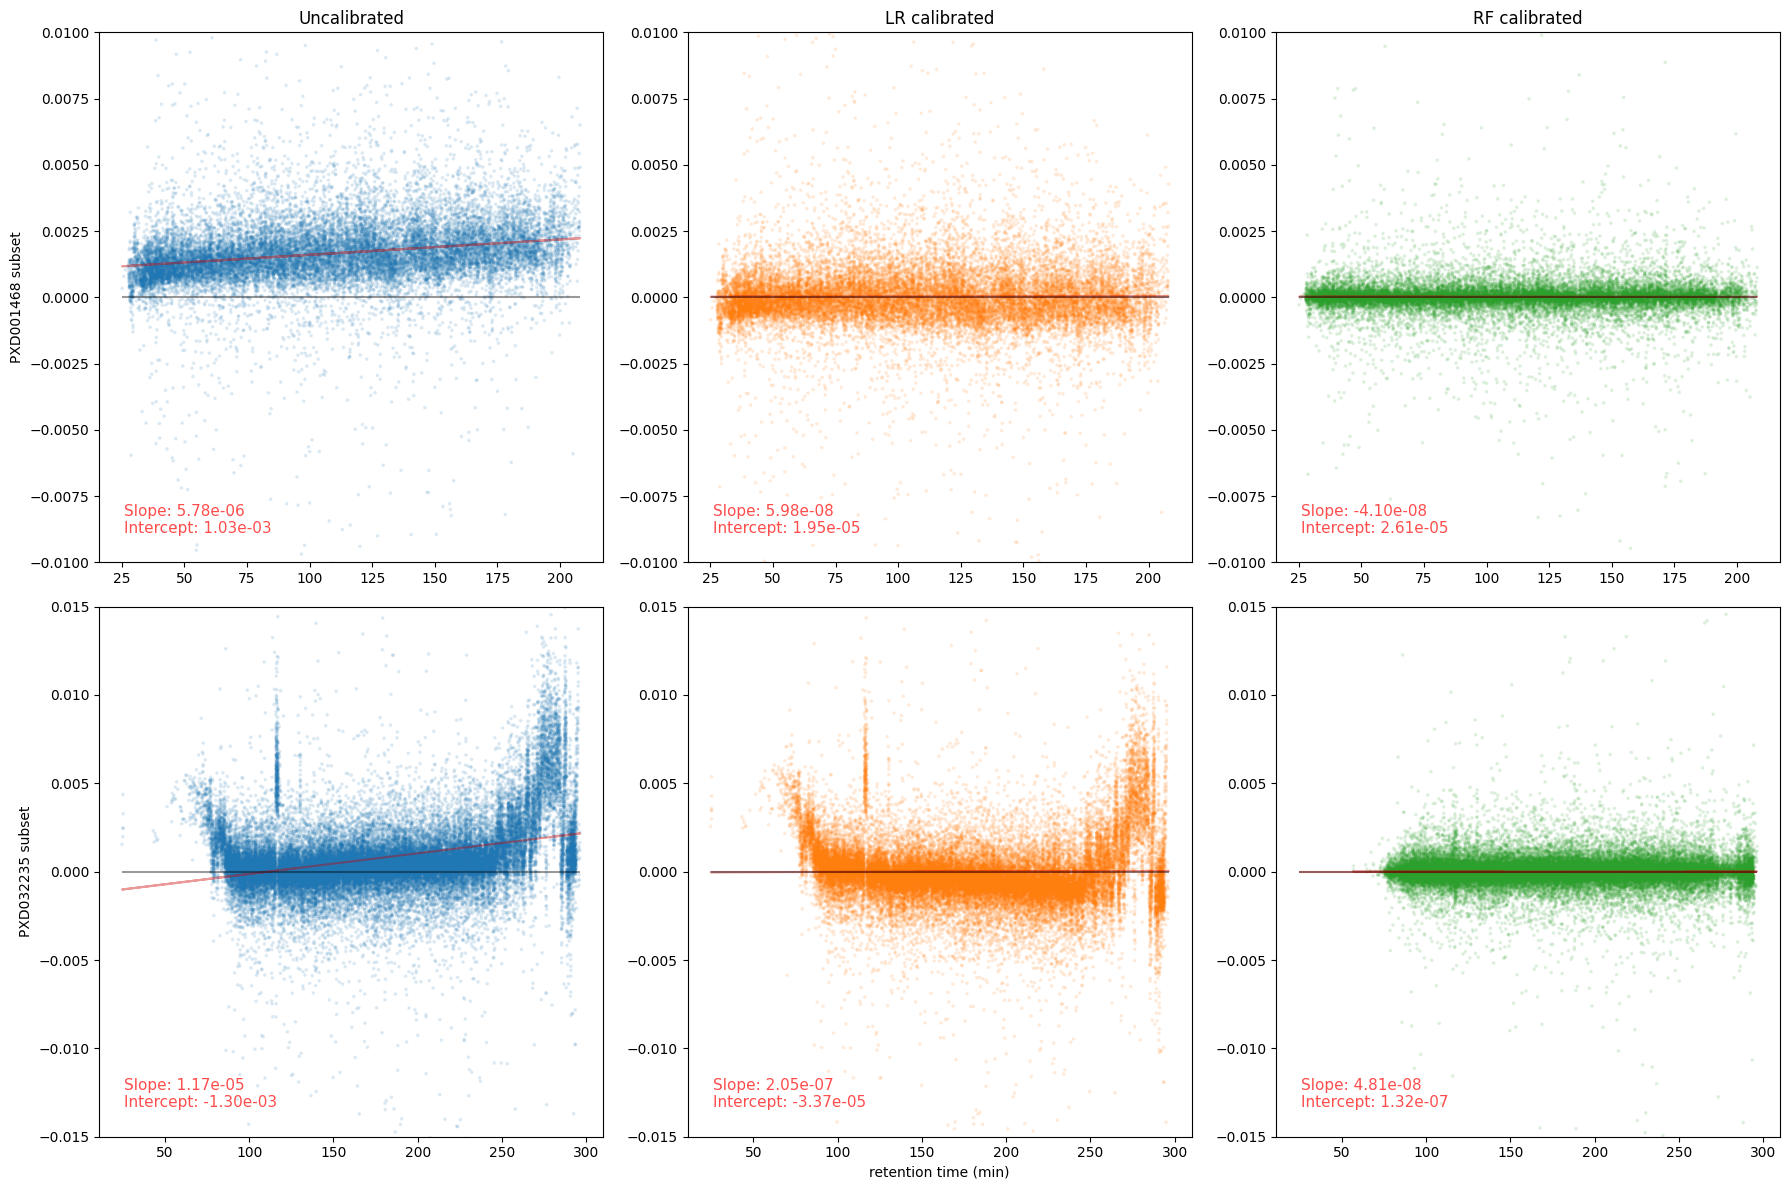

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dataframes for each type of data
dataframes_top = [df_uncal_features, df_LRcal_features, df_RFcal_features]
dataframes_bottom = [df_uncal_features_nonlin, df_LRcal_features_nonlin, df_RFcal_features_nonlin]
titles = ['Uncalibrated', 'LR calibrated', 'RF calibrated']
colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Loop through each dataframe and column, and create scatter plots for top row
for i, df in enumerate(dataframes_top):
    # Scatter plot
    axs[0, i].scatter(df['RT'], df['deltaMZ'], marker='o', linestyle='', alpha=0.1, s=3, color=colors[i])
    if i == 0:
        axs[0, i].set_ylabel('PXD001468 subset')
    axs[0, i].set_title(f'{titles[i]}')
    axs[0, i].set_ylim(-0.01, 0.01)

    # Fit a line
    x = df['RT']
    y = df['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[0, i].plot(x, polynomial(x), color=(0.8, 0, 0, 1), alpha=0.4)

    # Add horizontal line at y=0 with the same x-range as the data
    x_range = df['RT']
    axs[0, i].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)

    # Remove grid
    axs[0, i].grid(False)

    # Print intercept and slope values
    intercept = coefficients[1]
    slope = coefficients[0]
    axs[0, i].text(0.05, 0.05, f'Slope: {slope:.2e}\nIntercept: {intercept:.2e}', horizontalalignment='left', verticalalignment='bottom', transform=axs[0, i].transAxes, fontsize=11, color = 'red', alpha=0.7)

# Loop through each dataframe and column, and create scatter plots for bottom row
for i, df in enumerate(dataframes_bottom):
    # Scatter plot
    axs[1, i].scatter(df['RT'], df['deltaMZ'], marker='o', linestyle='', alpha=0.1, s=3, color=colors[i])
    if i == 0:
        axs[1, i].set_ylabel('PXD032235 subset')
    if i == 1:
        axs[1, i].set_xlabel('retention time (min)')
    
    axs[1, i].set_ylim(-0.015, 0.015)

    # Fit a line
    x = df['RT']
    y = df['deltaMZ']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    axs[1, i].plot(x, polynomial(x), color=(0.8, 0, 0, 1), alpha=0.4)

    # Add horizontal line at y=0 with the same x-range as the data
    if i == 2:  # For the bottom right plot
        x_range = dataframes_bottom[1]['RT']  # Using x-range from the bottom middle plot
        axs[1, i].hlines(0, min(x_range), max(x_range), colors='red', alpha=0.4)
        axs[1, i].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)
    else:
        x_range = df['RT']
        axs[1, i].hlines(0, min(x_range), max(x_range), colors='black', alpha=0.4)

    # Remove grid
    axs[1, i].grid(False)

    # Print intercept and slope values
    intercept = coefficients[1]
    slope = coefficients[0]
    axs[1, i].text(0.05, 0.05, f'Slope: {slope:.2e}\nIntercept: {intercept:.2e}', horizontalalignment='left', verticalalignment='bottom', transform=axs[1, i].transAxes, fontsize=11, color = 'red', alpha=0.7)

plt.tight_layout()
plt.show()


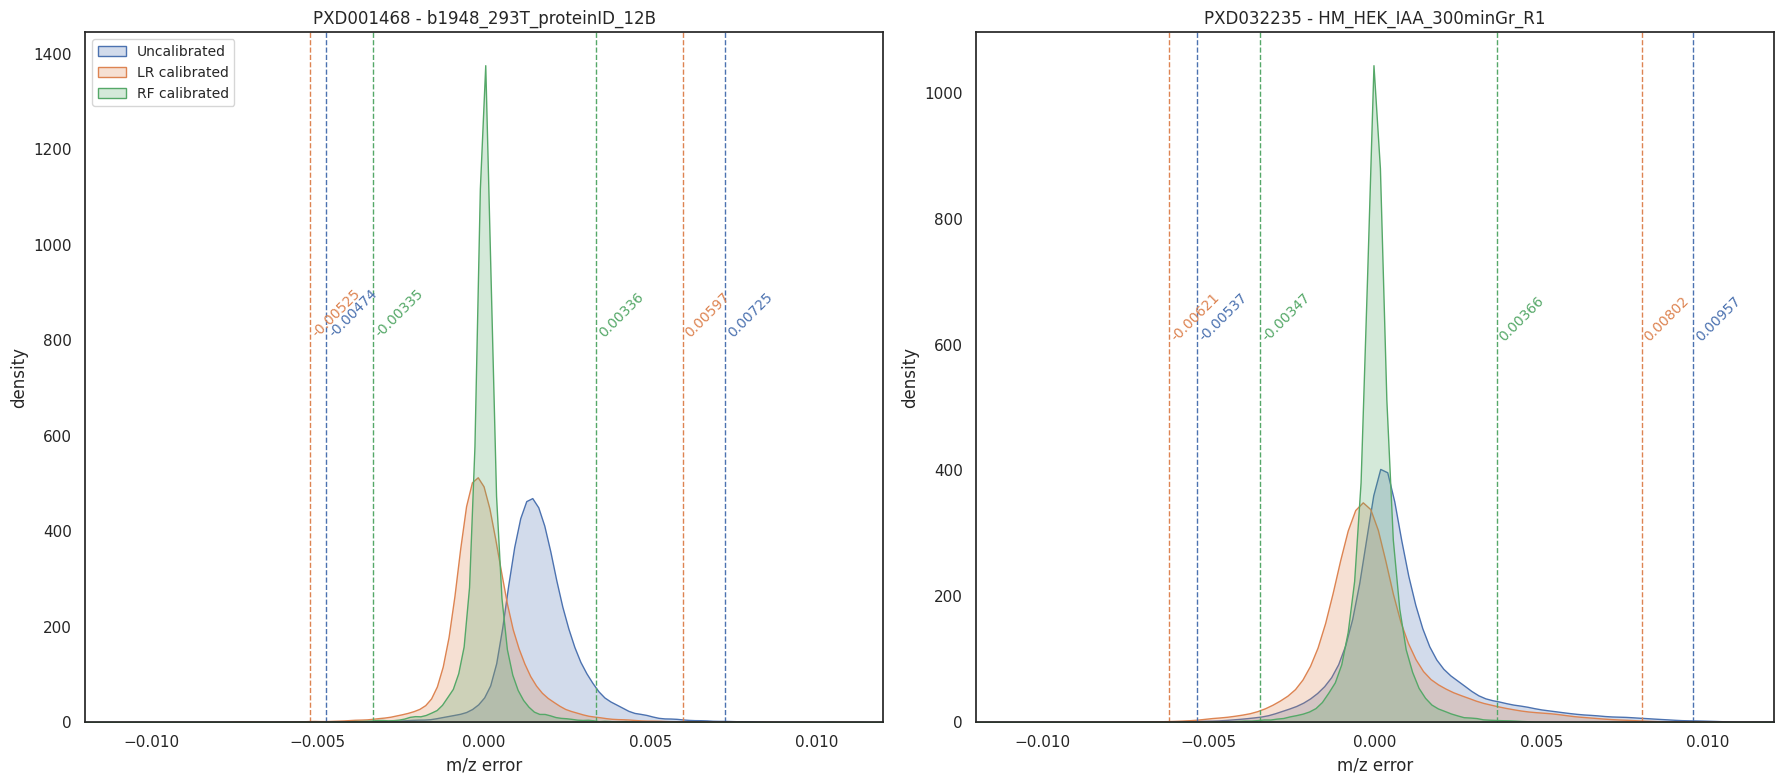

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles

# Set style to white
sns.set(style="white")

# Create a figure and two sets of axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Define columns to plot for both sets of dataframes
columns_to_plot = ['deltaMZ', 'deltaMZ', 'deltaMZ']
dataframes1 = [df_uncal_features, df_LRcal_features, df_RFcal_features]
dataframes2 = [df_uncal_features_nonlin, df_LRcal_features_nonlin, df_RFcal_features_nonlin]
labels = ['Uncalibrated', 'LR calibrated', 'RF calibrated']
colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# Initialize lists to store interval values for both sets of dataframes
interval_values1 = []
interval_values2 = []

# Loop through each dataframe and column, and create overlapping KDE plots for the first set
for df, column, label, color in zip(dataframes1, columns_to_plot, labels, colors):
    sns.kdeplot(df[column], label=label, fill=True, color=color, ax=ax1)
    
    # Calculate 99% interval
    quantiles = mquantiles(df[column], prob=[0.005, 0.995])
    
    # Store interval values
    interval_values1.append((quantiles[0], quantiles[1]))
    
    # Draw interval lines
    ax1.axvline(quantiles[0], color=color, linestyle='--', linewidth=1)
    ax1.axvline(quantiles[1], color=color, linestyle='--', linewidth=1)
    
    # Annotate interval values
    ax1.text(quantiles[0], 800, f'{quantiles[0]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=10, color=color)
    ax1.text(quantiles[1], 800, f'{quantiles[1]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=10, color=color)

# Loop through each dataframe and column, and create overlapping KDE plots for the second set
for df, column, label, color in zip(dataframes2, columns_to_plot, labels, colors):
    sns.kdeplot(df[column], label=label, fill=True, color=color, ax=ax2)
    
    # Calculate 99% interval
    quantiles = mquantiles(df[column], prob=[0.005, 0.995])
    
    # Store interval values
    interval_values2.append((quantiles[0], quantiles[1]))
    
    # Draw interval lines
    ax2.axvline(quantiles[0], color=color, linestyle='--', linewidth=1)
    ax2.axvline(quantiles[1], color=color, linestyle='--', linewidth=1)
    
    # Annotate interval values
    ax2.text(quantiles[0], 600, f'{quantiles[0]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=10, color=color)
    ax2.text(quantiles[1], 600, f'{quantiles[1]:.5f}', rotation=45, verticalalignment='bottom', horizontalalignment='left', fontsize=10, color=color)

# Set title and labels for the first subplot
ax1.set_title('PXD001468 - b1948_293T_proteinID_12B')
ax1.set_xlabel('m/z error')
ax1.set_ylabel('density')

# Set title and labels for the second subplot
ax2.set_title('PXD032235 - HM_HEK_IAA_300minGr_R1')
ax2.set_xlabel('m/z error')
ax2.set_ylabel('density')

# Move the legend for the first subplot to the top left and adjust font size
ax1.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='small')

# Set the x-axis limits for both subplots
ax1.set_xlim(-0.012, 0.012)
ax2.set_xlim(-0.012, 0.012)

# Show plot
plt.tight_layout()
plt.show()

In [9]:
df_uncal_results_q_99 = df_uncal_results_q[(df_uncal_results_q['deltaMZ'] > interval_values1[0][0]) & (df_uncal_results_q['deltaMZ'] < interval_values1[0][1])]
df_uncal_results_nonlin_q_99 = df_uncal_results_nonlin_q[(df_uncal_results_nonlin_q['deltaMZ'] > interval_values2[0][0]) & (df_uncal_results_nonlin_q['deltaMZ'] < interval_values2[0][1])]
df_LRcal_results_q_99 = df_LRcal_results_q[(df_LRcal_results_q['deltaMZ'] > interval_values1[1][0]) & (df_LRcal_results_q['deltaMZ'] < interval_values1[1][1])]
df_LRcal_results_nonlin_q_99 = df_LRcal_results_nonlin_q[(df_LRcal_results_nonlin_q['deltaMZ'] > interval_values2[1][0]) & (df_LRcal_results_nonlin_q['deltaMZ'] < interval_values2[1][1])]
df_RFcal_results_q_99 = df_RFcal_results_q[(df_RFcal_results_q['deltaMZ'] > interval_values1[2][0]) & (df_RFcal_results_q['deltaMZ'] < interval_values1[2][1])]
df_RFcal_results_nonlin_q_99 = df_RFcal_results_nonlin_q[(df_RFcal_results_nonlin_q['deltaMZ'] > interval_values2[2][0]) & (df_RFcal_results_nonlin_q['deltaMZ'] < interval_values2[2][1])]

KeyError: 'deltaMZ'

In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np

# Uncalibrated and LR Calibrated
statistic_lr, p_value_lr = mannwhitneyu(np.array(df_uncal_results_q_99['deltaMZ']), np.array(df_LRcal_results_q_99['deltaMZ']))
print("Uncalibrated vs. LR Calibrated:")
print("Test statistic:", statistic_lr)
print("p-value: {:.15f}".format(p_value_lr))  # Print p-value with more digits after the comma

# Uncalibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_uncal_results_q_99['deltaMZ'], df_RFcal_results_q_99['deltaMZ'])
print("\nUncalibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

# LR calibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_LRcal_results_q_99['deltaMZ'], df_RFcal_results_q_99['deltaMZ'])
print("\nLR calibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

In [51]:
((0.01199 - 0.01122) / 0.01199) * 100

6.422018348623852

In [52]:
((0.01199 - 0.00671) / 0.01199) * 100

44.03669724770643

In [53]:
((0.01493 - 0.01423) / 0.01493) * 100

4.68854655056933

In [54]:
((0.01493 - 0.00713) / 0.01493) * 100

52.2438044206296

In [17]:
df_uncal_results_qpep = df_uncal_results[df_uncal_results["peptide_q"] < 0.01]
unique_peptides = set(df_uncal_results_qpep["peptide"])
num_unique_peptides = len(unique_peptides)
print("Number of unique peptides with peptide_q < 0.01:", num_unique_peptides)

# For df_LRcal_results
df_LRcal_results_qpep = df_LRcal_results[df_LRcal_results["peptide_q"] < 0.01]
unique_peptides_LRcal = set(df_LRcal_results_qpep["peptide"])
num_unique_peptides_LRcal = len(unique_peptides_LRcal)
print("Number of unique peptides in LR Calibrated results with peptide_q < 0.01:", num_unique_peptides_LRcal)

# For df_RFcal_results
df_RFcal_results_qpep = df_RFcal_results[df_RFcal_results["peptide_q"] < 0.01]
unique_peptides_RFcal = set(df_RFcal_results_qpep["peptide"])
num_unique_peptides_RFcal = len(unique_peptides_RFcal)
print("Number of unique peptides in RF Calibrated results with peptide_q < 0.01:", num_unique_peptides_RFcal)

# For df_uncal_results_nonlin
df_uncal_results_nonlin_qpep = df_uncal_results_nonlin[df_uncal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_uncal_nonlin = set(df_uncal_results_nonlin_qpep["peptide"])
num_unique_peptides_uncal_nonlin = len(unique_peptides_uncal_nonlin)
print("Number of unique peptides in Uncalibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_uncal_nonlin)

# For df_LRcal_results_nonlin
df_LRcal_results_nonlin_qpep = df_LRcal_results_nonlin[df_LRcal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_LRcal_nonlin = set(df_LRcal_results_nonlin_qpep["peptide"])
num_unique_peptides_LRcal_nonlin = len(unique_peptides_LRcal_nonlin)
print("Number of unique peptides in LR Calibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_LRcal_nonlin)

# For df_RFcal_results_nonlin
df_RFcal_results_nonlin_qpep = df_RFcal_results_nonlin[df_RFcal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_RFcal_nonlin = set(df_RFcal_results_nonlin_qpep["peptide"])
num_unique_peptides_RFcal_nonlin = len(unique_peptides_RFcal_nonlin)
print("Number of unique peptides in RF Calibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_RFcal_nonlin)

Number of unique peptides with peptide_q < 0.01: 11852
Number of unique peptides in LR Calibrated results with peptide_q < 0.01: 12210
Number of unique peptides in RF Calibrated results with peptide_q < 0.01: 12194
Number of unique peptides in Uncalibrated Non-linear results with peptide_q < 0.01: 26412
Number of unique peptides in LR Calibrated Non-linear results with peptide_q < 0.01: 22945
Number of unique peptides in RF Calibrated Non-linear results with peptide_q < 0.01: 26035


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of dataframes, columns, names, and colors for the first row
dataframes_lin = [df_uncal_results, df_LRcal_results, df_RFcal_results]
dataframes_nonlin = [df_uncal_results_nonlin, df_LRcal_results_nonlin, df_RFcal_results_nonlin]
columns_to_plot = ['hyperscore', 'hyperscore', 'hyperscore']
names = ['Uncalibrated', 'LR Calibrated', 'RF Calibrated']
colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]]

# Define the list of dataframes, columns, names, and colors for the second row
dataframes_lin_q = [df_uncal_results_q, df_LRcal_results_q, df_RFcal_results_q]
dataframes_nonlin_q = [df_uncal_results_nonlin_q, df_LRcal_results_nonlin_q, df_RFcal_results_nonlin_q]

# Set up the figure and axes for two rows
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot for linear data in the first row
for df, column, color, name in zip(dataframes_lin, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[0, 0], label=name, shade=True, color=color)

# Set title and labels for linear data in the first row
axes[0, 0].set_title('unfiltered')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('PXD001468\ndensity')

# Plot for non-linear data in the first row
for df, column, color, name in zip(dataframes_lin_q, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[0, 1], label=name, shade=True, color=color)

# Set title and labels for non-linear data in the first row
axes[0, 1].set_title('spectrum q < 0.01 filtered')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# Plot for linear data in the second row
for df, column, color, name in zip(dataframes_nonlin, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[1, 0], label=name, shade=True, color=color)

# Set title and labels for linear data in the second row
axes[1, 0].set_xlabel('hyperscore')
axes[1, 0].set_ylabel('PXD032235\ndensity')
axes[1, 0].legend()

# Plot for non-linear data in the second row
for df, column, color, name in zip(dataframes_nonlin_q, columns_to_plot, colors, names):
    sns.kdeplot(df[column], ax=axes[1, 1], label=name, shade=True, color=color)

# Set title and labels for non-linear data in the second row
axes[1, 1].set_xlabel('hyperscore')
axes[1, 1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

NameError: name 'df_uncal_results' is not defined

In [19]:
from scipy.stats import mannwhitneyu
import numpy as np

# Define significance levels
significance_levels = [(0.001, "***"), (0.01, "**"), (0.05, "*")]

# Uncalibrated and LR Calibrated
statistic_lr, p_value_lr = mannwhitneyu(np.array(df_uncal_results_nonlin_q['hyperscore']), np.array(df_LRcal_results_nonlin_q['hyperscore']))
print("Uncalibrated vs. LR Calibrated:")
print("Test statistic:", statistic_lr)
print("p-value: {:.15f}".format(p_value_lr))  # Print p-value with more digits after the comma

# Uncalibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_uncal_results_nonlin_q['hyperscore'], df_RFcal_results_nonlin_q['hyperscore'])
print("\nUncalibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

# LR calibrated and RF Calibrated
statistic_rf, p_value_rf = mannwhitneyu(df_LRcal_results_nonlin_q['hyperscore'], df_RFcal_results_nonlin_q['hyperscore'])
print("\nLR calibrated vs. RF Calibrated:")
print("Test statistic:", statistic_rf)
print("p-value: {:.15f}".format(p_value_rf))  # Print p-value with more digits after the comma

Uncalibrated vs. LR Calibrated:
Test statistic: 977723379.5
p-value: 0.000000000000000

Uncalibrated vs. RF Calibrated:
Test statistic: 1091934432.5
p-value: 0.000000000000000

LR calibrated vs. RF Calibrated:
Test statistic: 869238297.5
p-value: 0.000011006161127


In [19]:
merged_data = df_uncal_results_q.merge(df_LRcal_results_q, on='scannr', how='outer', suffixes=('_uncal', ''))
merged_data = merged_data.merge(df_RFcal_results_q, on='scannr', how='outer', suffixes=('_calLIN', '_calRF'))
merged_data.head()
print(merged_data.shape)

merged_data_nonlin = df_uncal_results_nonlin_q.merge(df_LRcal_results_nonlin_q, on='scannr', how='outer', suffixes=('_uncal', ''))
merged_data_nonlin = merged_data_nonlin.merge(df_RFcal_results_nonlin_q, on='scannr', how='outer', suffixes=('_calLIN', '_calRF'))
merged_data_nonlin.head()
print(merged_data_nonlin.shape)

(21052, 106)
(46805, 106)


/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

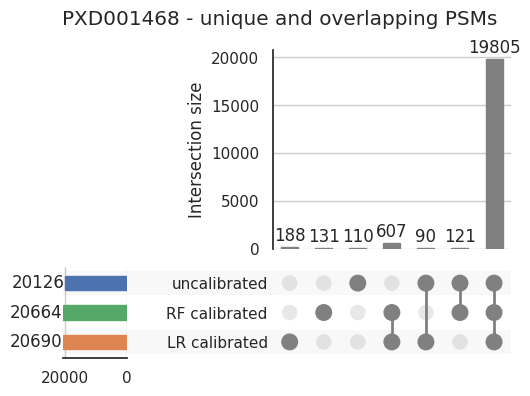

In [20]:
df_uncal_scannr = set(df_uncal_results_q['scannr'])
df_calLIN_scannr = set(df_LRcal_results_q['scannr'])
df_calRF_scannr = set(df_RFcal_results_q['scannr'])

len_uncal = len(df_uncal_scannr - df_calLIN_scannr - df_calRF_scannr)
len_LRcal = len(df_calLIN_scannr - df_uncal_scannr - df_calRF_scannr)
len_RFcal = len(df_calRF_scannr - df_uncal_scannr - df_calLIN_scannr)
len_unLRcal = len(df_uncal_scannr & df_calLIN_scannr - df_calRF_scannr)
len_unRFcal = len(df_uncal_scannr & df_calRF_scannr - df_calLIN_scannr)
len_LRRFcal = len(df_calLIN_scannr & df_calRF_scannr - df_uncal_scannr)
len_all = len(df_uncal_scannr & df_calLIN_scannr & df_calRF_scannr)

import matplotlib
from matplotlib import pyplot as plt
from upsetplot import from_memberships, UpSet
import seaborn as sns

example = from_memberships(
    [['RF calibrated'],
     ['LR calibrated'],
     ['LR calibrated', 'RF calibrated'],
     ['uncalibrated'],
     ['uncalibrated', 'RF calibrated'],
     ['uncalibrated', 'LR calibrated'],
     ['uncalibrated', 'LR calibrated', 'RF calibrated'],
     ],
    data=[len_RFcal, len_LRcal, len_LRRFcal, len_uncal, len_unRFcal, len_unLRcal, len_all]
    )

upset = UpSet(example, show_counts=True, facecolor="gray", sort_categories_by=None)

upset.style_categories(
    ["uncalibrated"], bar_facecolor=sns.color_palette()[0])
upset.style_categories(
    ["LR calibrated"], bar_facecolor=sns.color_palette()[1])
upset.style_categories(
    ["RF calibrated"], bar_facecolor=sns.color_palette()[2])

upset.plot()


plt.suptitle("PXD001468 - unique and overlapping PSMs")
plt.show()

/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

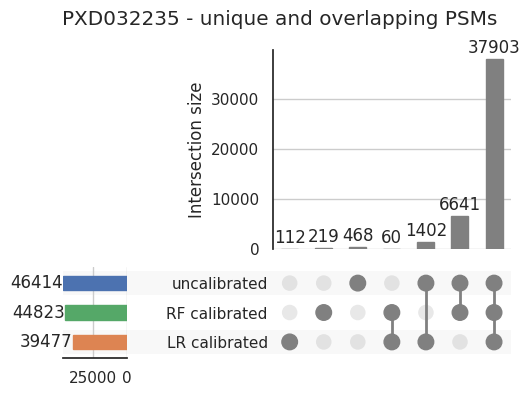

In [21]:
df_uncal_scannr = set(df_uncal_results_nonlin_q['scannr'])
df_calLIN_scannr = set(df_LRcal_results_nonlin_q['scannr'])
df_calRF_scannr = set(df_RFcal_results_nonlin_q['scannr'])

len_uncal = len(df_uncal_scannr - df_calLIN_scannr - df_calRF_scannr)
len_LRcal = len(df_calLIN_scannr - df_uncal_scannr - df_calRF_scannr)
len_RFcal = len(df_calRF_scannr - df_uncal_scannr - df_calLIN_scannr)
len_unLRcal = len(df_uncal_scannr & df_calLIN_scannr - df_calRF_scannr)
len_unRFcal = len(df_uncal_scannr & df_calRF_scannr - df_calLIN_scannr)
len_LRRFcal = len(df_calLIN_scannr & df_calRF_scannr - df_uncal_scannr)
len_all = len(df_uncal_scannr & df_calLIN_scannr & df_calRF_scannr)

import matplotlib
from matplotlib import pyplot as plt
from upsetplot import from_memberships
example = from_memberships(
    [['RF calibrated'],
     ['LR calibrated'],
     ['LR calibrated', 'RF calibrated'],
     ['uncalibrated'],
     ['uncalibrated', 'RF calibrated'],
     ['uncalibrated', 'LR calibrated'],
     ['uncalibrated', 'LR calibrated', 'RF calibrated'],
     ],
    data=[len_RFcal, len_LRcal, len_LRRFcal, len_uncal, len_unRFcal, len_unLRcal, len_all]
    )

upset = UpSet(example, show_counts=True, facecolor="gray", sort_categories_by=None)

upset.style_categories(
    ["uncalibrated"], bar_facecolor=sns.color_palette()[0])
upset.style_categories(
    ["LR calibrated"], bar_facecolor=sns.color_palette()[1])
upset.style_categories(
    ["RF calibrated"], bar_facecolor=sns.color_palette()[2])

upset.plot()


plt.suptitle("PXD032235 - unique and overlapping PSMs")
plt.show()

In [22]:
df_uncal_results_qpep = df_uncal_results[df_uncal_results["peptide_q"] < 0.01]
unique_peptides = set(df_uncal_results_qpep["peptide"])
num_unique_peptides = len(unique_peptides)
print("Number of unique peptides with peptide_q < 0.01:", num_unique_peptides)

# For df_LRcal_results
df_LRcal_results_qpep = df_LRcal_results[df_LRcal_results["peptide_q"] < 0.01]
unique_peptides_LRcal = set(df_LRcal_results_qpep["peptide"])
num_unique_peptides_LRcal = len(unique_peptides_LRcal)
print("Number of unique peptides in LR Calibrated results with peptide_q < 0.01:", num_unique_peptides_LRcal)

# For df_RFcal_results
df_RFcal_results_qpep = df_RFcal_results[df_RFcal_results["peptide_q"] < 0.01]
unique_peptides_RFcal = set(df_RFcal_results_qpep["peptide"])
num_unique_peptides_RFcal = len(unique_peptides_RFcal)
print("Number of unique peptides in RF Calibrated results with peptide_q < 0.01:", num_unique_peptides_RFcal)

# For df_uncal_results_nonlin
df_uncal_results_nonlin_qpep = df_uncal_results_nonlin[df_uncal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_uncal_nonlin = set(df_uncal_results_nonlin_qpep["peptide"])
num_unique_peptides_uncal_nonlin = len(unique_peptides_uncal_nonlin)
print("Number of unique peptides in Uncalibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_uncal_nonlin)

# For df_LRcal_results_nonlin
df_LRcal_results_nonlin_qpep = df_LRcal_results_nonlin[df_LRcal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_LRcal_nonlin = set(df_LRcal_results_nonlin_qpep["peptide"])
num_unique_peptides_LRcal_nonlin = len(unique_peptides_LRcal_nonlin)
print("Number of unique peptides in LR Calibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_LRcal_nonlin)

# For df_RFcal_results_nonlin
df_RFcal_results_nonlin_qpep = df_RFcal_results_nonlin[df_RFcal_results_nonlin["peptide_q"] < 0.01]
unique_peptides_RFcal_nonlin = set(df_RFcal_results_nonlin_qpep["peptide"])
num_unique_peptides_RFcal_nonlin = len(unique_peptides_RFcal_nonlin)
print("Number of unique peptides in RF Calibrated Non-linear results with peptide_q < 0.01:", num_unique_peptides_RFcal_nonlin)

Number of unique peptides with peptide_q < 0.01: 11852
Number of unique peptides in LR Calibrated results with peptide_q < 0.01: 12210
Number of unique peptides in RF Calibrated results with peptide_q < 0.01: 12194
Number of unique peptides in Uncalibrated Non-linear results with peptide_q < 0.01: 26412
Number of unique peptides in LR Calibrated Non-linear results with peptide_q < 0.01: 22945
Number of unique peptides in RF Calibrated Non-linear results with peptide_q < 0.01: 26035


In [23]:
merged_datapep = df_uncal_results_qpep.merge(df_LRcal_results_qpep, on='scannr', how='outer', suffixes=('_uncal', ''))
merged_datapep = merged_datapep.merge(df_RFcal_results_qpep, on='scannr', how='outer', suffixes=('_calLIN', '_calRF'))
merged_datapep.head()
print(merged_datapep.shape)

merged_data_nonlinpep = df_uncal_results_nonlin_qpep.merge(df_LRcal_results_nonlin_qpep, on='scannr', how='outer', suffixes=('_uncal', ''))
merged_data_nonlinpep = merged_data_nonlinpep.merge(df_RFcal_results_nonlin_qpep, on='scannr', how='outer', suffixes=('_calLIN', '_calRF'))
merged_data_nonlinpep.head()
print(merged_data_nonlinpep.shape)

(21808, 106)
(47475, 106)


/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

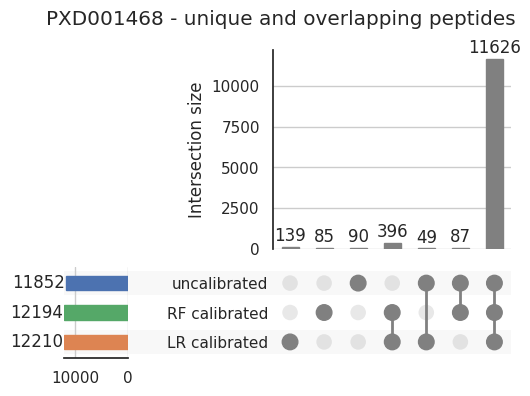

In [24]:
# Extract peptide sequences from each dataset
peptides_uncal = set(merged_datapep['peptide_uncal'].dropna())
peptides_calLIN = set(merged_datapep['peptide_calLIN'].dropna())
peptides_calRF = set(merged_datapep['peptide_calRF'].dropna())

# Find overlaps
overlap_uncal_calLIN = peptides_uncal.intersection(peptides_calLIN)
overlap_uncal_calRF = peptides_uncal.intersection(peptides_calRF)
overlap_calLIN_calRF = peptides_calLIN.intersection(peptides_calRF)
overlap_uncal_calLIN_calRF = peptides_uncal.intersection(peptides_calLIN, peptides_calRF)

peplen_uncal = len(peptides_uncal - overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_LRcal = len(peptides_calLIN - overlap_uncal_calLIN - overlap_calLIN_calRF - overlap_uncal_calLIN_calRF)
peplen_RFcal = len(peptides_calRF - overlap_uncal_calRF - overlap_calLIN_calRF - overlap_uncal_calLIN_calRF)
peplen_unLRcal = len(overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_unRFcal = len(overlap_uncal_calRF - overlap_uncal_calLIN - overlap_uncal_calLIN_calRF)
peplen_LRRFcal = len(overlap_calLIN_calRF - overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_all = len(overlap_uncal_calLIN_calRF)

import matplotlib
from matplotlib import pyplot as plt
from upsetplot import from_memberships
example = from_memberships(
    [['RF calibrated'],
     ['LR calibrated'],
     ['LR calibrated', 'RF calibrated'],
     ['uncalibrated'],
     ['uncalibrated', 'RF calibrated'],
     ['uncalibrated', 'LR calibrated'],
     ['uncalibrated', 'LR calibrated', 'RF calibrated'],
     ],
    data=[peplen_RFcal, peplen_LRcal, peplen_LRRFcal, peplen_uncal, peplen_unRFcal, peplen_unLRcal, peplen_all]
    )

upset = UpSet(example, show_counts=True, facecolor="gray", sort_categories_by=None)

upset.style_categories(
    ["uncalibrated"], bar_facecolor=sns.color_palette()[0])
upset.style_categories(
    ["LR calibrated"], bar_facecolor=sns.color_palette()[1])
upset.style_categories(
    ["RF calibrated"], bar_facecolor=sns.color_palette()[2])

upset.plot()


plt.suptitle("PXD001468 - unique and overlapping peptides")
plt.show()

/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/nathan/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

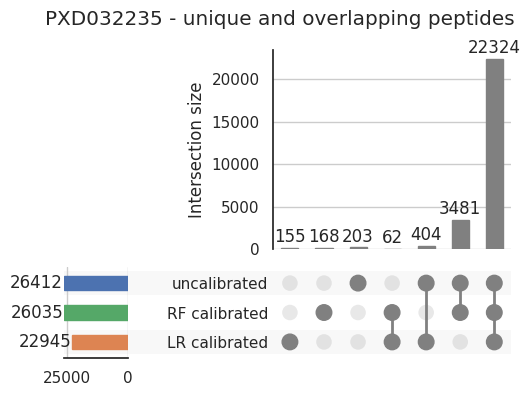

In [27]:
# Extract peptide sequences from each dataset
peptides_uncal = set(merged_data_nonlinpep['peptide_uncal'].dropna())
peptides_calLIN = set(merged_data_nonlinpep['peptide_calLIN'].dropna())
peptides_calRF = set(merged_data_nonlinpep['peptide_calRF'].dropna())

# Find overlaps
overlap_uncal_calLIN = peptides_uncal.intersection(peptides_calLIN)
overlap_uncal_calRF = peptides_uncal.intersection(peptides_calRF)
overlap_calLIN_calRF = peptides_calLIN.intersection(peptides_calRF)
overlap_uncal_calLIN_calRF = peptides_uncal.intersection(peptides_calLIN, peptides_calRF)

peplen_uncal = len(peptides_uncal - overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_LRcal = len(peptides_calLIN - overlap_uncal_calLIN - overlap_calLIN_calRF - overlap_uncal_calLIN_calRF)
peplen_RFcal = len(peptides_calRF - overlap_uncal_calRF - overlap_calLIN_calRF - overlap_uncal_calLIN_calRF)
peplen_unLRcal = len(overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_unRFcal = len(overlap_uncal_calRF - overlap_uncal_calLIN - overlap_uncal_calLIN_calRF)
peplen_LRRFcal = len(overlap_calLIN_calRF - overlap_uncal_calLIN - overlap_uncal_calRF - overlap_uncal_calLIN_calRF)
peplen_all = len(overlap_uncal_calLIN_calRF)

import matplotlib
from matplotlib import pyplot as plt
from upsetplot import from_memberships
example = from_memberships(
    [['RF calibrated'],
     ['LR calibrated'],
     ['LR calibrated', 'RF calibrated'],
     ['uncalibrated'],
     ['uncalibrated', 'RF calibrated'],
     ['uncalibrated', 'LR calibrated'],
     ['uncalibrated', 'LR calibrated', 'RF calibrated'],
     ],
    data=[peplen_RFcal, peplen_LRcal, peplen_LRRFcal, peplen_uncal, peplen_unRFcal, peplen_unLRcal, peplen_all]
    )

upset = UpSet(example, show_counts=True, facecolor="gray", sort_categories_by=None)

upset.style_categories(
    ["uncalibrated"], bar_facecolor=sns.color_palette()[0])
upset.style_categories(
    ["LR calibrated"], bar_facecolor=sns.color_palette()[1])
upset.style_categories(
    ["RF calibrated"], bar_facecolor=sns.color_palette()[2])

upset.plot()


plt.suptitle("PXD032235 - unique and overlapping peptides")
plt.show()

In [28]:
import pandas as pd
import os

def get_PSMs(file_path):
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File '{file_path}' does not exist.")
        return None
    
    # Read the TSV file into a DataFrame
    try:
        df = pd.read_csv(file_path, sep='\t')
    except Exception as e:
        print(f"Error reading file '{file_path}': {e}")
        return None
    
    # Get the number of rows in the DataFrame
    num_rows = len(df)
    
    return num_rows

In [29]:
import pandas as pd
import os

def get_PSMs_q(file_path):
    # Check if the file exists
    if not os.path.exists(file_path):
        print(f"File '{file_path}' does not exist.")
        return None
    
    # Read the TSV file into a DataFrame
    try:
        df = pd.read_csv(file_path, sep='\t')
        df_q = df[df['spectrum_q'] < 0.01]
    except Exception as e:
        print(f"Error reading file '{file_path}': {e}")
        return None
    
    # Get the number of rows in the DataFrame
    num_rows = len(df_q)
    
    return num_rows

In [30]:
# Directory path
directory = "/home/nathan/.vscode-server/thesis/MassCalibFull/MassCallibration/results/sage/"

# Initialize dictionaries
UNcalLIN = {}
LRcalLIN = {}
RFcalLIN = {}
UNcalNONLIN = {}
LRcalNONLIN = {}
RFcalNONLIN = {}

# Iterate over files in the directory
for filename in os.listdir(directory):
    # Check if the file is a TSV file and starts with "SearchClosed"
    if filename.endswith(".tsv") and filename.startswith("NoChimericSearchClosed"):
        file_path = os.path.join(directory, filename)
        # Extract calibration type and linearity
        cal_line = filename.split("ppm")[1].split(".results.sage.tsv")[0]   # e.g. LRcalNONLIN
        ppm_type = filename.split("SearchClosed")[1].split("ppm")[0]        # e.g. 25
        # Apply the function to the file
        num_PSMs = get_PSMs_q(file_path)
        if num_PSMs is not None:
            # Update the corresponding dictionary
            if cal_line == "UNcalLIN":
                UNcalLIN[ppm_type] = num_PSMs
            elif cal_line == "LRcalLIN":
                LRcalLIN[ppm_type] = num_PSMs
            elif cal_line == "RFcalLIN":
                RFcalLIN[ppm_type] = num_PSMs
            elif cal_line == "UNcalNONLIN":
                UNcalNONLIN[ppm_type] = num_PSMs
            elif cal_line == "LRcalNONLIN":
                LRcalNONLIN[ppm_type] = num_PSMs
            elif cal_line == "RFcalNONLIN":
                RFcalNONLIN[ppm_type] = num_PSMs

# Convert keys to integers and sort the dictionaries
sorted_UNcalLIN = dict(sorted({int(key): value for key, value in UNcalLIN.items()}.items()))
sorted_LRcalLIN = dict(sorted({int(key): value for key, value in LRcalLIN.items()}.items()))
sorted_RFcalLIN = dict(sorted({int(key): value for key, value in RFcalLIN.items()}.items()))
sorted_UNcalNONLIN = dict(sorted({int(key): value for key, value in UNcalNONLIN.items()}.items()))
sorted_LRcalNONLIN = dict(sorted({int(key): value for key, value in LRcalNONLIN.items()}.items()))
sorted_RFcalNONLIN = dict(sorted({int(key): value for key, value in RFcalNONLIN.items()}.items()))

# Print the sorted dictionaries
print("Sorted UNcalLIN:", sorted_UNcalLIN)
print("Sorted LRcalLIN:", sorted_LRcalLIN)
print("Sorted RFcalLIN:", sorted_RFcalLIN)
print("Sorted UNcalNONLIN:", sorted_UNcalNONLIN)
print("Sorted LRcalNONLIN:", sorted_LRcalNONLIN)
print("Sorted RFcalNONLIN:", sorted_RFcalNONLIN)

Sorted UNcalLIN: {5: 18837, 10: 20126, 15: 20632, 20: 20661, 25: 20463, 30: 20538}
Sorted LRcalLIN: {5: 18299, 10: 20690, 15: 20826, 20: 20721, 25: 20473, 30: 20056}
Sorted RFcalLIN: {5: 20016, 10: 20664, 15: 20865, 25: 20606, 30: 20667}
Sorted UNcalNONLIN: {5: 40361, 10: 46414, 15: 47084, 20: 47231, 25: 47247, 30: 47118}
Sorted LRcalNONLIN: {5: 35403, 10: 39477, 15: 46981, 20: 47194, 25: 47207, 30: 47137}
Sorted RFcalNONLIN: {5: 30940, 10: 44823, 15: 46918, 20: 47217, 25: 47271, 30: 47154}


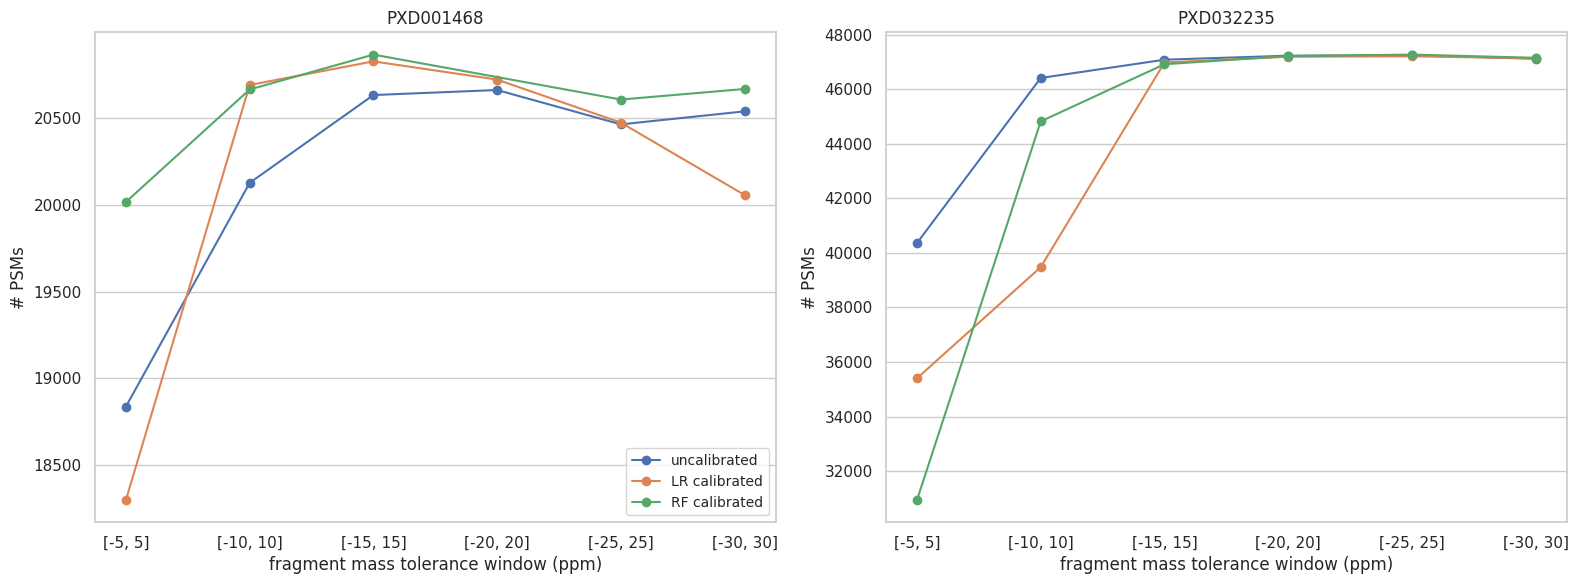

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style
sns.set_style("whitegrid")

# Extract data from the sorted dictionaries for linear data
x_values_UNcalLIN = list(sorted_UNcalLIN.keys())
y_values_UNcalLIN = list(sorted_UNcalLIN.values())

x_values_LRcalLIN = list(sorted_LRcalLIN.keys())
y_values_LRcalLIN = list(sorted_LRcalLIN.values())

x_values_RFcalLIN = list(sorted_RFcalLIN.keys())
y_values_RFcalLIN = list(sorted_RFcalLIN.values())

# Extract data from the sorted dictionaries for nonlinear data
x_values_UNcalNONLIN = list(sorted_UNcalNONLIN.keys())
y_values_UNcalNONLIN = list(sorted_UNcalNONLIN.values())

x_values_LRcalNONLIN = list(sorted_LRcalNONLIN.keys())
y_values_LRcalNONLIN = list(sorted_LRcalNONLIN.values())

x_values_RFcalNONLIN = list(sorted_RFcalNONLIN.keys())
y_values_RFcalNONLIN = list(sorted_RFcalNONLIN.values())

# Define the x-axis tick labels
xtick_labels = ['[-5, 5]', '[-10, 10]', '[-15, 15]', '[-20, 20]', '[-25, 25]', '[-30, 30]']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot linear data
axes[0].plot(x_values_UNcalLIN, y_values_UNcalLIN, marker='o', linestyle='-', color=sns.color_palette()[0], label='uncalibrated')
axes[0].plot(x_values_LRcalLIN, y_values_LRcalLIN, marker='o', linestyle='-', color=sns.color_palette()[1], label='LR calibrated')
axes[0].plot(x_values_RFcalLIN, y_values_RFcalLIN, marker='o', linestyle='-', color=sns.color_palette()[2], label='RF calibrated')
axes[0].set_title('PXD001468')
axes[0].set_xlabel('fragment mass tolerance window (ppm)')
axes[0].set_ylabel('# PSMs')
axes[0].set_xticks([5, 10, 15, 20, 25, 30])
axes[0].set_xticklabels(xtick_labels)
axes[0].legend(fontsize=10)
axes[0].grid(axis='x')

# Plot nonlinear data
axes[1].plot(x_values_UNcalNONLIN, y_values_UNcalNONLIN, marker='o', linestyle='-', color=sns.color_palette()[0], label='uncalibrated')
axes[1].plot(x_values_LRcalNONLIN, y_values_LRcalNONLIN, marker='o', linestyle='-', color=sns.color_palette()[1], label='LR calibrated')
axes[1].plot(x_values_RFcalNONLIN, y_values_RFcalNONLIN, marker='o', linestyle='-', color=sns.color_palette()[2], label='RF calibrated')
axes[1].set_title('PXD032235')
axes[1].set_xlabel('fragment mass tolerance window (ppm)')
axes[1].set_ylabel('# PSMs')
axes[1].set_xticks([5, 10, 15, 20, 25, 30])
axes[1].set_xticklabels(xtick_labels)
axes[1].grid(axis='x')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [8]:
((30940 - 44823) / 30940) * 100

-44.87071751777634

In [10]:
(47084+46981+46918)/3

46994.333333333336